# <font color = 'dark blue'> Lending Club Case Study </font>
#### Group Facilitator: Abhinav Singh
#### Team Member: Bharathraj Saravanan

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. <br>

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.<br>

In other words, the company wants to understand the **driving factors (or driver variables)** behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Getting the loan csv file given.

In [3]:
# read in the file with the encoding detected by chardet
loan_data = pd.read_csv("loan.csv")
loan_data.shape

C:\Users\Abhinav\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(39717, 111)

### Data Understanding

In [4]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
loan_data.shape

(39717, 111)

Checking the data spread for the  **target variable - loan_status**

In [8]:
loan_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

- The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan.<br>
- The ones marked 'current' are in the process of paying the instalments, neither fully paid not defaulted, so we don't need current loans and hence removing it.<br>


In [9]:
# Dropping current loans
loan_data = loan_data[~(loan_data.loan_status == 'Current')]
loan_data.shape

(38577, 111)

In [10]:
# Checking loan status
loan_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

- Tagging the two values as 0 or 1 to make the analysis simple and clean. 

In [11]:
loan_data['loan_status_ind'] = loan_data.loan_status.apply(lambda x: 0 if x == 'Fully Paid' else 1)

In [12]:
# Checking loan status
loan_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [13]:
# Checking loan status ind
loan_data.loan_status_ind.value_counts()

0    32950
1     5627
Name: loan_status_ind, dtype: int64

### <font color = 'dark blue'> Data Cleaning </font>
- Fixing missing values

In [14]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
col_wise_nulls = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 3)

In [15]:
# Checking first twenty
col_wise_nulls[:20]

id                      0.000
member_id               0.000
loan_amnt               0.000
funded_amnt             0.000
funded_amnt_inv         0.000
term                    0.000
int_rate                0.000
installment             0.000
grade                   0.000
sub_grade               0.000
emp_title               6.185
emp_length              2.678
home_ownership          0.000
annual_inc              0.000
verification_status     0.000
issue_d                 0.000
loan_status             0.000
pymnt_plan              0.000
url                     0.000
desc                   32.473
dtype: float64

In [16]:
col_wise_nulls[21:40]

title                      0.029
zip_code                   0.000
addr_state                 0.000
dti                        0.000
delinq_2yrs                0.000
earliest_cr_line           0.000
inq_last_6mths             0.000
mths_since_last_delinq    64.559
mths_since_last_record    92.897
open_acc                   0.000
pub_rec                    0.000
revol_bal                  0.000
revol_util                 0.130
total_acc                  0.000
initial_list_status        0.000
out_prncp                  0.000
out_prncp_inv              0.000
total_pymnt                0.000
total_pymnt_inv            0.000
dtype: float64

- Dropping mths_since_last_delinq and mths_since_last_record columns since more than 60 percent data are missing values.

In [17]:
loan_data = loan_data.drop(['mths_since_last_delinq','mths_since_last_record'],axis=1)
loan_data.shape

(38577, 110)

- Now instead of checking columns one by one and dropping one by one. Chceking for columns having missing percentage > 60 and dropping it, except the above two columns since we already dropped it.

In [18]:
null_columns = col_wise_nulls[(col_wise_nulls > 60) & (col_wise_nulls.index != 'mths_since_last_delinq') & (col_wise_nulls.index != 'mths_since_last_record')]

In [19]:
null_columns.shape

(55,)

As a matter of fact, all the 55 columns are totally blanks. Since we dropped all the current loans

In [20]:
null_columns

next_pymnt_d                      100.0
mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0
total_cu_tl                       100.0
inq_last_12m                      100.0
acc_open_past_24mths              100.0
avg_cur_bal                       100.0
bc_open_to_buy                    100.0


In [21]:
# Dropping all the 55 columns
loan_data = loan_data.drop(null_columns.index,axis=1)
loan_data.shape

(38577, 55)

In [22]:
# Given columns + one loan status indicator col - 57 null columns
111 + 1 - 57

55

In [23]:
# Checking the missing percentage again
round(100*(loan_data.isnull().sum()/len(loan_data.index)), 3)

id                             0.000
member_id                      0.000
loan_amnt                      0.000
funded_amnt                    0.000
funded_amnt_inv                0.000
term                           0.000
int_rate                       0.000
installment                    0.000
grade                          0.000
sub_grade                      0.000
emp_title                      6.185
emp_length                     2.678
home_ownership                 0.000
annual_inc                     0.000
verification_status            0.000
issue_d                        0.000
loan_status                    0.000
pymnt_plan                     0.000
url                            0.000
desc                          32.473
purpose                        0.000
title                          0.029
zip_code                       0.000
addr_state                     0.000
dti                            0.000
delinq_2yrs                    0.000
earliest_cr_line               0.000
i

- We still have few columns having some amount of null values let's treat them in univeriate analysis. And also fixing rows and columns values are being handled in univeriate analysis.<br>

Before that,<br>
- The customer behavior variables(those which are generated after the loan is approved) are not available at the time of loan application, and thus they
cannot be used as predictors for credit approval. So dropping all those columns, which are mentioned below.<br>

delinq_2yrs,
earliest_cr_line,
inq_last_6mths,
open_acc,
pub_rec,
revol_bal,
revol_util,
total_acc,
out_prncp,
out_prncp_inv,
total_pymnt,
total_pymnt_inv,
total_rec_prncp,
total_rec_int,
total_rec_late_fee,
recoveries,
collection_recovery_fee,
last_pymnt_d,
last_pymnt_amnt,
last_credit_pull_d,
application_type

In [24]:
loan_data = loan_data.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis =1 )
loan_data.shape

(38577, 34)

In [25]:
# Total columns - Customer behavior columns
55-21

34

In [26]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

### <font color = 'dark blue'> Data Analysis </font>

#### Univariate & Segmented Univariate Analysis

Let's start with checking the default rate across all the **categorical features.**

**1. Term - The number of payments on the loan. Values are in months and can be either 36 or 60.**

In [27]:
# Checking distribution of data
loan_data.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

<AxesSubplot:>

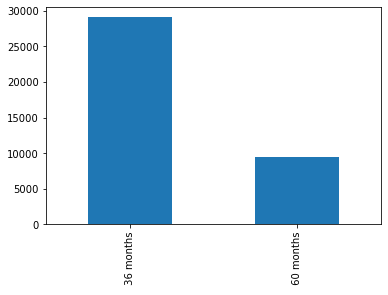

In [28]:
# Plot it
loan_data.term.value_counts().plot(kind='bar')

In [29]:
# Checking the default rate across the variable
loan_data.groupby('term').loan_status_ind.value_counts()

term        loan_status_ind
 36 months  0                  25869
            1                   3227
 60 months  0                   7081
            1                   2400
Name: loan_status_ind, dtype: int64

<AxesSubplot:xlabel='term'>

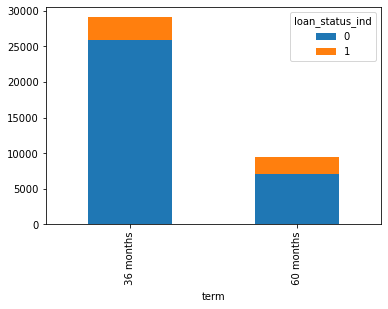

In [30]:
# Let's see the default rate across term periods
loan_data.groupby('term').loan_status_ind.value_counts().unstack().plot(kind='bar',stacked=True)

In [31]:
# Let's see in percentage
loan_data.groupby('term').loan_status_ind.value_counts(normalize=True)

term        loan_status_ind
 36 months  0                  0.889091
            1                  0.110909
 60 months  0                  0.746862
            1                  0.253138
Name: loan_status_ind, dtype: float64

<AxesSubplot:xlabel='term'>

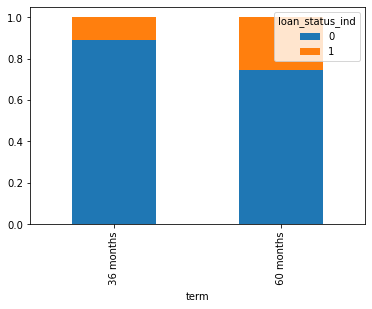

In [32]:
# Let's plot it
loan_data.groupby('term').loan_status_ind.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

- We have good volume of data in both the terms.
- When comparing default rate across the terms, we can see more no.of loans are defaulted in 36 months term while comapring with 60 months term loans.
- But when seeing in percentage we can clearly see that, `25% of 60 months` term loans are defaulting. On the other hand, `11% of 36 months`term loans are defaulting.

**Recommendation:** So **36 months term** loans are preferrable.

**2. int_rate - Interest Rate on the loan**

In [33]:
# Let's check the data in the int_rate variable
loan_data.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38577, dtype: object

Since we have more classification of data and also it can be changed to continuous variable. Removing the percentage sign `%` and converting to continuous variable. And then binning it to get some picture.

In [34]:
loan_data.int_rate = loan_data.int_rate.apply(lambda x: float(x[:-1]))

In [35]:
# Let's see the distribution
loan_data.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

Binning by difference of 5 percentages. And started only from `5%` since it is the `minimum` and upto `25%` since that was the `maximum` value.


In [36]:
loan_data['int_rate_bins'] = pd.cut(loan_data['int_rate'],bins=[5,10,15,20,25],labels=['5%-10%','10%-15%','15%-20%','20%-25%'])

In [37]:
# let's check the distribution after binning
loan_data.int_rate_bins.value_counts()

10%-15%    18265
5%-10%     12316
15%-20%     7226
20%-25%      770
Name: int_rate_bins, dtype: int64

<AxesSubplot:xlabel='int_rate_bins'>

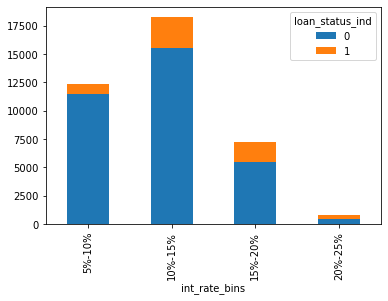

In [38]:
# Checking default rate across int_rate bins
loan_data.groupby('int_rate_bins').loan_status_ind.value_counts().unstack().plot(kind='bar',stacked=True)

In [39]:
# Now in percentage
loan_data.groupby('int_rate_bins').loan_status_ind.value_counts(normalize=True)

int_rate_bins  loan_status_ind
5%-10%         0                  0.932608
               1                  0.067392
10%-15%        0                  0.851793
               1                  0.148207
15%-20%        0                  0.751730
               1                  0.248270
20%-25%        0                  0.615584
               1                  0.384416
Name: loan_status_ind, dtype: float64

<AxesSubplot:xlabel='int_rate_bins'>

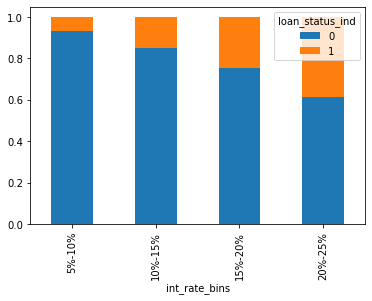

In [40]:
# Let's plot it
loan_data.groupby('int_rate_bins').loan_status_ind.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

- The amount of data is descreasing as the int rate percentage increases. And even though the data is `smaller` in higher percentages, the defaulting rate is `higher`.
- So we can clearly say that, `Higher the int_rate, Higher the risk of defaulting`.

**Recommendation:** **Lower the int rate, Lower the risk of defaulting**. 5 to 10% int rate is preferrable.

**3. Grade - LC assigned loan grade**

In [41]:
# Let's see the distribution
loan_data.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade'>

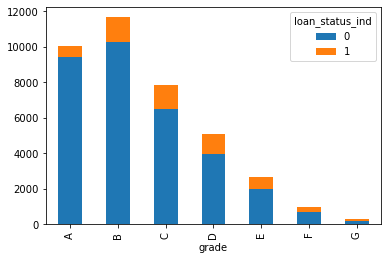

In [42]:
# Checking default rate across the grades
loan_data.groupby('grade').loan_status_ind.value_counts().unstack().plot(kind='bar',stacked=True)

In [43]:
# Let's see in percentage
loan_data.groupby('grade').loan_status_ind.value_counts(normalize=True)

grade  loan_status_ind
A      0                  0.940070
       1                  0.059930
B      0                  0.877944
       1                  0.122056
C      0                  0.828057
       1                  0.171943
D      0                  0.780138
       1                  0.219862
E      0                  0.731506
       1                  0.268494
F      0                  0.673156
       1                  0.326844
G      0                  0.662207
       1                  0.337793
Name: loan_status_ind, dtype: float64

<AxesSubplot:xlabel='grade'>

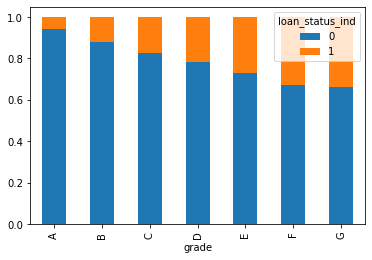

In [44]:
# Let's plot it
loan_data.groupby('grade').loan_status_ind.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

- The amount of data is descreasing as the grade increases alphabetically. And even though the data is `smaller` in higher alphabets, the defaulting rate is `higher`.
- So we can clearly say that, `Higher the grade, Higher the risk of defaulting`.

**Recommendation:** **Lower the grade, Lower the risk of defaulting**. Grade A is preferrable.

**4. sub_grade - LC assigned loan subgrade**

In [45]:
# Let's see the distribution
loan_data.sub_grade.value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='sub_grade'>

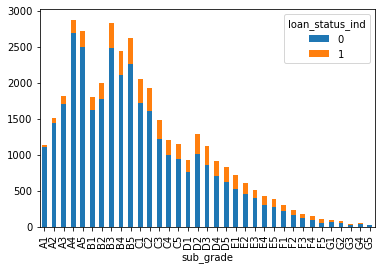

In [46]:
# Checking default rate across the subgrades
loan_data.groupby('sub_grade').loan_status_ind.value_counts().unstack().plot(kind='bar',stacked=True)

In [47]:
# Let's see the percentage
loan_data.groupby('sub_grade').loan_status_ind.value_counts(normalize=True).head(10)

sub_grade  loan_status_ind
A1         0                  0.973661
           1                  0.026339
A2         0                  0.950928
           1                  0.049072
A3         0                  0.943094
           1                  0.056906
A4         0                  0.938044
           1                  0.061956
A5         0                  0.920074
           1                  0.079926
Name: loan_status_ind, dtype: float64

<AxesSubplot:xlabel='sub_grade'>

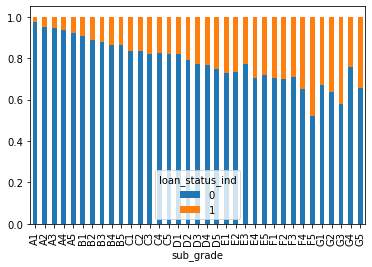

In [48]:
loan_data.groupby('sub_grade').loan_status_ind.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

- Since the subgrade variable is a sub category of grade variable. All the results are same.
- As the same of grade variable, The amount of data is descreasing as the grade increases alphabetically. And even though the data is `smaller` in higher alphabets, the defaulting rate is `higher`.
- So we can clearly say that, `Higher the grade, Higher the risk of defaulting`.
    - We kind of recommanded Grade A. So here if we see in subgrades of A, The amount of data increases as the subgrade increases as well. So we can't say a specific grade here. Hence by overall Grade A is preferrable.
    
**Recommendation:** **Lower the grade, Lower the risk of defaulting**. Grade A is preferrable.

Now, Grade and Subgrade are giving us the same result. So we don't need both of them right. Hence, I am `dropping subgrade` variable as we got the `same results with the less clasifications in grade variable itself`.

In [49]:
# Dropping Subgrade
loan_data.drop('sub_grade',axis=1,inplace=True)

**5. emp_title - The job title supplied by the Borrower when applying for the loan.**

In [50]:
# Let's see the distribution
loan_data.emp_title.value_counts().head(10)

US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
USAF                  52
Wells Fargo           52
UPS                   52
US Air Force          51
Walmart               45
Name: emp_title, dtype: int64

- The data is inconsistent and it has huge volume of data. So it's better not to consider this variable for defaulting analysis.

**We couldn't derive any information from emp_title variable as the data is inconsistent.**

**6. emp_length - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.**

In [51]:
# Let's see the distribution
loan_data.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

<AxesSubplot:xlabel='emp_length'>

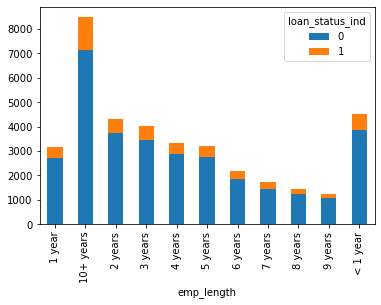

In [52]:
# Checking default rate across the emp_lengths
loan_data.groupby('emp_length').loan_status_ind.value_counts().unstack().plot(kind='bar',stacked=True)

In [53]:
# Let's see in percentage
loan_data.groupby('emp_length').loan_status_ind.value_counts(normalize=True)

emp_length  loan_status_ind
1 year      0                  0.856106
            1                  0.143894
10+ years   0                  0.843190
            1                  0.156810
2 years     0                  0.867863
            1                  0.132137
3 years     0                  0.861665
            1                  0.138335
4 years     0                  0.861759
            1                  0.138241
5 years     0                  0.856606
            1                  0.143394
6 years     0                  0.858395
            1                  0.141605
7 years     0                  0.846289
            1                  0.153711
8 years     0                  0.858537
            1                  0.141463
9 years     0                  0.871126
            1                  0.128874
< 1 year    0                  0.858252
            1                  0.141748
Name: loan_status_ind, dtype: float64

<AxesSubplot:xlabel='emp_length'>

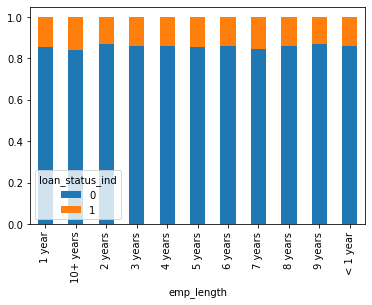

In [54]:
# Let's plot it
loan_data.groupby('emp_length').loan_status_ind.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

- We have good volume of data in every emp_lenth.
- When comparing default rate across the emp_lengths, we coludn't see much difference in the defaulting rate across the emp_lengths. All of them are having around 13% to 15% defaulting rate.

**Recommendation: We couldn't see any pattern in defaulting rate in emp_length variable.**

**7. home_ownership - The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.**

In [55]:
# Let's see the distribution
loan_data.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='home_ownership'>

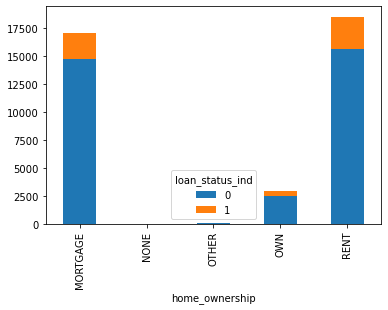

In [56]:
# Checking default rate across the home_ownerships
loan_data.groupby('home_ownership').loan_status_ind.value_counts().unstack().plot(kind='bar',stacked=True)

In [57]:
# Let's see in percentage
loan_data.groupby('home_ownership').loan_status_ind.value_counts(normalize=True)

home_ownership  loan_status_ind
MORTGAGE        0                  0.863287
                1                  0.136713
NONE            0                  1.000000
OTHER           0                  0.816327
                1                  0.183673
OWN             0                  0.851092
                1                  0.148908
RENT            0                  0.846374
                1                  0.153626
Name: loan_status_ind, dtype: float64

<AxesSubplot:xlabel='home_ownership'>

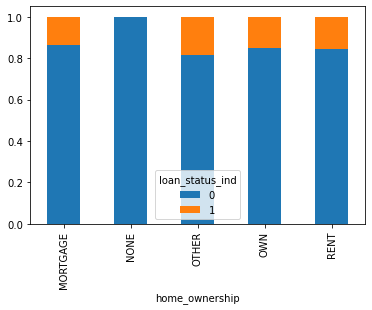

In [58]:
# Let's plot it
loan_data.groupby('home_ownership').loan_status_ind.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

- We have more volume of data in Rent and Mortgage while compariing to other categories. But even though we have less amount of data we have more default rate in other category.
- But we couldn't jump into conclusions since the data is very less while comparing to others. And also while we see oveall defaulting rate, it is around 13% to 18% across all of them.

**Recommendation: We couldn't see much of a pattern in defaulting rate but while we have other as home_membership, need some more focus on them while verifying.**

**8. verification_status - Indicates if income was verified by LC, not verified, or if the income source was verified**

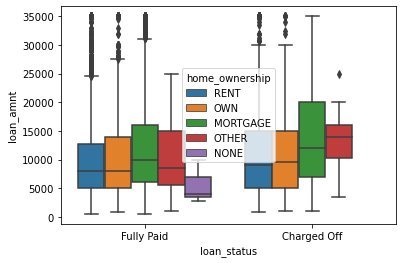

In [59]:
#Further Analysis
sns.boxplot(data = loan_data, y = "loan_amnt", x = "loan_status", hue = "home_ownership")
plt.show()

In [60]:
# Let's see the distribution
loan_data.verification_status.value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

<AxesSubplot:xlabel='verification_status'>

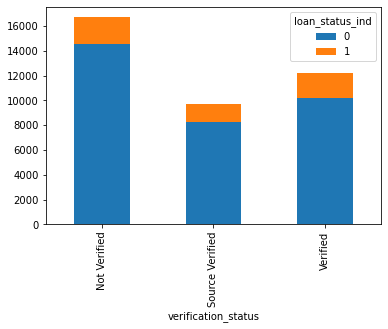

In [61]:
# Checking default rate across the verification_status
loan_data.groupby('verification_status').loan_status_ind.value_counts().unstack().plot(kind='bar',stacked=True)

In [62]:
# Let's see in percentage
loan_data.groupby('verification_status').loan_status_ind.value_counts(normalize=True)

verification_status  loan_status_ind
Not Verified         0                  0.871690
                     1                  0.128310
Source Verified      0                  0.851814
                     1                  0.148186
Verified             0                  0.831968
                     1                  0.168032
Name: loan_status_ind, dtype: float64

<AxesSubplot:xlabel='verification_status'>

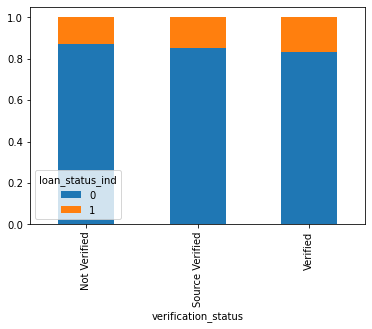

In [63]:
# Let's plot it
loan_data.groupby('verification_status').loan_status_ind.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

- Here the results are quite opposite. The verified ones has more default rate while comparing the not verified.
- But we couldn't say, with this we should choose not verified requests. Obviously it's better to go with verfied one.

**Recommendation: So, As we couldn't see correct pattern in defaulting rate, It's better to not consider this variable.**

**9. issue_d - The month which the loan was funded**

In [64]:
# Let's see the distribution
loan_data.issue_d.value_counts()

Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

Since, we have too many values, Let's try to split them into just 12 months irrespective of year. And check if we can get any pattern.

In [65]:
# Getting only months
loan_data['issue_month'] = loan_data.issue_d.apply(lambda x: x[:3])

<AxesSubplot:xlabel='issue_month'>

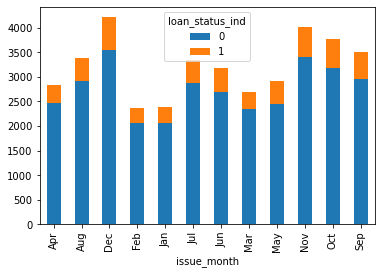

In [66]:
# Checking default rate across months
loan_data.groupby('issue_month').loan_status_ind.value_counts().unstack().plot(kind='bar',stacked=True)

In [67]:
# Let's see in percentage
loan_data.groupby('issue_month').loan_status_ind.value_counts(normalize=True)

issue_month  loan_status_ind
Apr          0                  0.869304
             1                  0.130696
Aug          0                  0.861865
             1                  0.138135
Dec          0                  0.839146
             1                  0.160854
Feb          0                  0.877014
             1                  0.122986
Jan          0                  0.865069
             1                  0.134931
Jul          0                  0.857058
             1                  0.142942
Jun          0                  0.848113
             1                  0.151887
Mar          0                  0.871052
             1                  0.128948
May          0                  0.840356
             1                  0.159644
Nov          0                  0.850724
             1                  0.149276
Oct          0                  0.845786
             1                  0.154214
Sep          0                  0.843625
             1              

<AxesSubplot:xlabel='issue_month'>

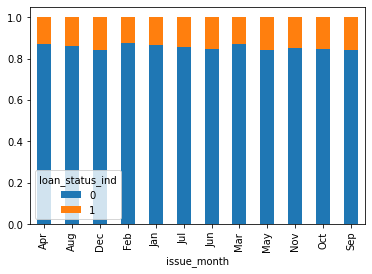

In [68]:
# Let's plot it
loan_data.groupby('issue_month').loan_status_ind.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

- We have good amount of data across all the months.
- But we couldn't see any pattern across months for defaulting.
- I am not going to check for years, since even if it has any pattern, it could be because of some other variable or any particular incident. Which may be out of scope.
- So for example, Even if we find 2007 has high defaulting rate, we can't do anything with this insight for upcoming year. But if we had some pattern in months, we may used it for upcoming months. But we didn't find any.

**Recommendation: We couldn't find any pattern in issue_d for defaulting.**

**10. pymnt_plan - Indicates if a payment plan has been put in place for the loan**

In [69]:
# Let's see the distribution
loan_data.pymnt_plan.value_counts()

n    38577
Name: pymnt_plan, dtype: int64

- As there are no classifications in the pymnt_plan. 

**we won't get any insights for defaulting with this variable.**

**11. purpose - A category provided by the borrower for the loan request.**

In [70]:
# Let's see the distribution
loan_data.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

<AxesSubplot:xlabel='purpose'>

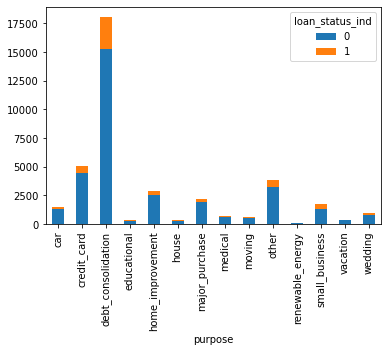

In [71]:
# Checking default rate across the purpose
loan_data.groupby('purpose').loan_status_ind.value_counts().unstack().plot(kind='bar',stacked=True)

In [72]:
# Let's see in percentage
loan_data.groupby('purpose').loan_status_ind.value_counts(normalize=True)

purpose             loan_status_ind
car                 0                  0.893262
                    1                  0.106738
credit_card         0                  0.892182
                    1                  0.107818
debt_consolidation  0                  0.846746
                    1                  0.153254
educational         0                  0.827692
                    1                  0.172308
home_improvement    0                  0.879304
                    1                  0.120696
house               0                  0.839237
                    1                  0.160763
major_purchase      0                  0.896744
                    1                  0.103256
medical             0                  0.844347
                    1                  0.155653
moving              0                  0.840278
                    1                  0.159722
other               0                  0.836223
                    1                  0.163777
rene

<AxesSubplot:xlabel='purpose'>

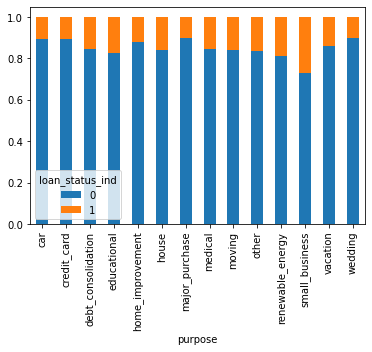

In [73]:
# Let's plot it
loan_data.groupby('purpose').loan_status_ind.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

- We have very large amount of data going into debt_consolidation.
- Small business have huge defaulting rate while comparing to others.
- Wedding, car, credit card & major purpose are feels safer when comparing to other purposes.

**Recommendation: It's better to ignore small business or double check in verifying.<br>
First level risk - small business<br>
second level risk - renewable_energy, other, educational, medical, moving<br>
Third level risk - debt_consolidation, vacation**

**12. title - The loan title provided by the borrower**

In [74]:
# Let's see the distribution
loan_data.title.value_counts()

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64

- The data is inconsistent and it has huge volume of data. So it's better not to consider this variable for defaulting analysis.

**We couldn't derive any information from title variable as the data is inconsistent.**

**13. zip_code - The first 3 numbers of the zip code provided by the borrower in the loan application.**

In [75]:
# Let's check the distribution
loan_data.zip_code.value_counts()

100xx    583
945xx    531
112xx    502
606xx    493
070xx    455
        ... 
463xx      1
381xx      1
592xx      1
414xx      1
469xx      1
Name: zip_code, Length: 822, dtype: int64

In this variable as well, we have huge data. So let's just check zip codes with `frequency > 100` and `defaulting rate > 20%` then see if we can get any insights.

In [76]:
# 1. Getting zip codes with frequency > 100. And saving those zip codes to zips_w100_counts
zips_w100_counts = loan_data.zip_code.value_counts() >= 100

# Getting all the data with those zip codes. And saving it in loan_data_zip_wise
loan_data_zip_wise = loan_data[loan_data.zip_code.isin(zips_w100_counts[zips_w100_counts == True].index)]

In [77]:
# Now checking the percentage of default rate across those zip codes and sacing it in zips_w10_pert_default
zips_w20_pert_default = loan_data_zip_wise.groupby('zip_code').loan_status_ind.value_counts(normalize=True)

# Since it is multilevel index. Taking out the loan_status_ind level index to get the default(1) percentages
zips_w20_pert_default = zips_w20_pert_default.unstack(level='loan_status_ind')

# 2. Getting zip codes with defaulting rate > 20%
zips_w20_pert_default = zips_w20_pert_default[zips_w20_pert_default[1] > 0.20]

# Getting all the data with those zip codes. And saving it in loan_data_zip_wise
loan_data_zip_wise = loan_data_zip_wise[loan_data_zip_wise.zip_code.isin(zips_w20_pert_default.index)]

<AxesSubplot:xlabel='zip_code'>

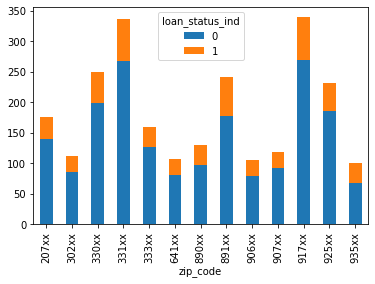

In [78]:
# Checking default rate across the zip_codes
loan_data_zip_wise.groupby('zip_code').loan_status_ind.value_counts().unstack().plot(kind='bar',stacked=True)

In [79]:
# Let's see in percentage
loan_data_zip_wise.groupby('zip_code').loan_status_ind.value_counts(normalize=True)

zip_code  loan_status_ind
207xx     0                  0.794286
          1                  0.205714
302xx     0                  0.765766
          1                  0.234234
330xx     0                  0.795181
          1                  0.204819
331xx     0                  0.792285
          1                  0.207715
333xx     0                  0.792453
          1                  0.207547
641xx     0                  0.757009
          1                  0.242991
890xx     0                  0.751938
          1                  0.248062
891xx     0                  0.735537
          1                  0.264463
906xx     0                  0.752381
          1                  0.247619
907xx     0                  0.773109
          1                  0.226891
917xx     0                  0.791176
          1                  0.208824
925xx     0                  0.797414
          1                  0.202586
935xx     0                  0.670000
          1             

<AxesSubplot:xlabel='zip_code'>

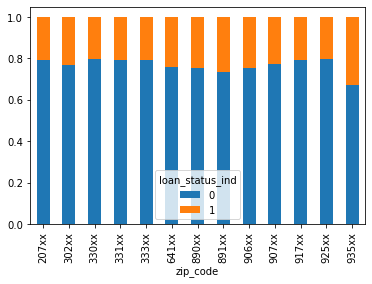

In [80]:
# Let's plot it
loan_data_zip_wise.groupby('zip_code').loan_status_ind.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

- For zip code, since we can't plot and see all the values. Filtered the zip codes with default rate > 20 percent and frequency > 100 then ploted.

- These zip codes can be ignored while investing 207xx,302xx,330xx,331xx,,641xx,890xx,891xx,906xx,907xx,917xx,925xx935xx. Since they have more than 20% default rate.
 
**Recommendation: This variable can predict the default rate and help to ignore some of the zip codes.**

**14. addr_state - The state provided by the borrower in the loan application**

In [81]:
# let's see the distribution of data
loan_data.addr_state.value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

Like zip code, in this variable as well, we have huge data. So let's just check addr_state with `frequency > 100` and `defaulting rate > 15%` then see if we can get any insights.

In [82]:
# 1. Getting addr_state with frequency > 100. And saving those addr_state to addr_state_w100_counts
addr_state_w100_counts = loan_data.addr_state.value_counts() >= 100

# Getting all the data with those addr_state. And saving it in loan_data_addr_state_wise
loan_data_addr_state_wise = loan_data[loan_data.addr_state.isin(addr_state_w100_counts[addr_state_w100_counts == True].index)]

In [83]:
# Now checking the percentage of default rate across those addr_state and sacing it in addr_state_w15_pert_default
addr_state_w15_pert_default = loan_data_addr_state_wise.groupby('addr_state').loan_status_ind.value_counts(normalize=True)

# Since it is multilevel index. Taking out the loan_status_ind level index to get the default(1) percentages
addr_state_w15_pert_default = addr_state_w15_pert_default.unstack(level='loan_status_ind')

# 2. Getting addr_state with defaulting rate > 15%
addr_state_w15_pert_default = addr_state_w15_pert_default[addr_state_w15_pert_default[1] > 0.15]

# Getting all the data with those addr_state. And saving it in loan_data_addr_state_wise
loan_data_addr_state_wise = loan_data_addr_state_wise[loan_data_addr_state_wise.addr_state.isin(addr_state_w15_pert_default.index)]

<AxesSubplot:xlabel='addr_state'>

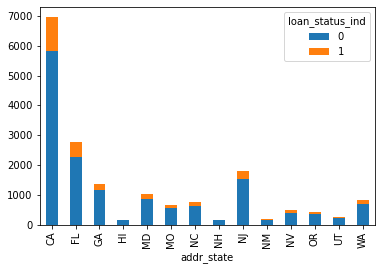

In [84]:
# Checking default rate across the addr_state
loan_data_addr_state_wise.groupby('addr_state').loan_status_ind.value_counts().unstack().plot(kind='bar',stacked=True)

In [85]:
# Let's see in percentage
loan_data_addr_state_wise.groupby('addr_state').loan_status_ind.value_counts(normalize=True)

addr_state  loan_status_ind
CA          0                  0.838106
            1                  0.161894
FL          0                  0.818770
            1                  0.181230
GA          0                  0.841795
            1                  0.158205
HI          0                  0.831325
            1                  0.168675
MD          0                  0.841642
            1                  0.158358
MO          0                  0.829851
            1                  0.170149
NC          0                  0.848000
            1                  0.152000
NH          0                  0.849398
            1                  0.150602
NJ          0                  0.844693
            1                  0.155307
NM          0                  0.836066
            1                  0.163934
NV          0                  0.774530
            1                  0.225470
OR          0                  0.836782
            1                  0.163218
UT          

<AxesSubplot:xlabel='addr_state'>

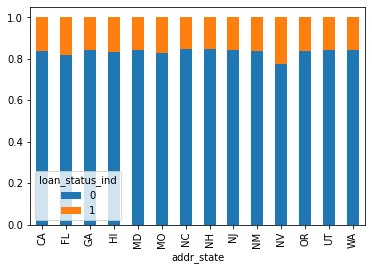

In [86]:
# Let's plot it
loan_data_addr_state_wise.groupby('addr_state').loan_status_ind.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

- For addr_state, since we can't plot and see all values. Filtered the addr_states with default rate > 15 percent and frequency > 100 then ploted.
 
**Recommendation: This variable can predict the default rate and help to ignore some of the addr_state.**

**15. initial_list_status - The initial listing status of the loan. Possible values are – W, F**

In [87]:
# Let's check the distribution
loan_data.initial_list_status.value_counts()

f    38577
Name: initial_list_status, dtype: int64

- As there are no classifications in the initial_list_status. 

**we won't get any insights for defaulting with this variable.**

16. `id` (A unique LC assigned ID for the loan listing) a identifier which won't give us any insights.
17. `member_id` (A unique LC assigned Id for the borrower member) a identifier which won't give us any insights.
18. `url` (URL for the LC page with listing data) again a identifier which won't give us any insights.
19. `desc` (Loan description provided by the borrower) is describing about perticular listing. So we won't get any insights.

- So we don't need `id, member_id, url & desc` variables for our analysis. Hence `dropping` it.

In [88]:
# Dropping id, member_id, url and desc variables.
loan_data.drop(['id','member_id','url','desc'],axis = 1,inplace=True)

- Since we didn't get any insights from the below columns and they won't be useful for further analysis. Dropping all of them.

- emp_title, title, pymnt_plan, initial_list_status

In [89]:
# Dropping emp_title, title, pymnt_plan, initial_list_status variables.
loan_data.drop(['emp_title','title','pymnt_plan','initial_list_status'],axis = 1,inplace=True)

### Univariate & Segmented Univariate Analysis on Continuous Variables

**20. collections_12_mths_ex_med - Number of collections in 12 months excluding medical collections**

In [90]:
# Let's check the unique values
loan_data.collections_12_mths_ex_med.unique()

array([ 0., nan])

- We have only zeros and null values here. And it won't be useful for further analysis.

    **So we won't get any insights for defaulting with this variable.** Hence dropping it.

In [91]:
# Dropping collections_12_mths_ex_med 
loan_data.drop(['collections_12_mths_ex_med'],axis = 1,inplace=True)

**21. chargeoff_within_12_mths - Number of charge-offs within 12 months**

In [92]:
# Let's check the unique values
loan_data.chargeoff_within_12_mths.unique()

array([ 0., nan])

- Again We have only zeros and null values here. And it won't be useful for further analysis.

    **So we won't get any insights for defaulting with this variable.** Hence dropping it.

In [93]:
# Dropping chargeoff_within_12_mths
loan_data.drop(['chargeoff_within_12_mths'],axis = 1,inplace=True)

**22. pub_rec_bankruptcies - Number of public record bankruptcies**

In [94]:
# Let's check the unique values
loan_data.pub_rec_bankruptcies.nunique()

3

In [95]:
loan_data.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [96]:
# Let's check the distribution
loan_data.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    36238
1.0     1637
NaN      697
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [97]:
# Let's replace NaNs with 'None'
loan_data.pub_rec_bankruptcies = loan_data.pub_rec_bankruptcies.fillna('None')

<AxesSubplot:xlabel='pub_rec_bankruptcies'>

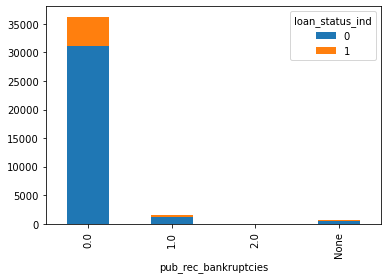

In [98]:
# Checking default rate across the pub_rec_bankruptcies
loan_data.groupby('pub_rec_bankruptcies').loan_status_ind.value_counts().unstack().plot(kind='bar',stacked=True)

In [99]:
# Let's see in percentage
loan_data.groupby('pub_rec_bankruptcies').loan_status_ind.value_counts(normalize=True)

pub_rec_bankruptcies  loan_status_ind
0.0                   0                  0.858132
                      1                  0.141868
1.0                   0                  0.776420
                      1                  0.223580
2.0                   0                  0.600000
                      1                  0.400000
None                  0                  0.830703
                      1                  0.169297
Name: loan_status_ind, dtype: float64

<AxesSubplot:xlabel='pub_rec_bankruptcies'>

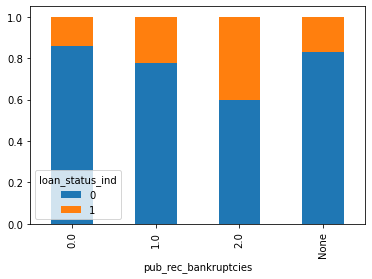

In [100]:
# Let's plot it
loan_data.groupby('pub_rec_bankruptcies').loan_status_ind.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

- We don't have enough data in `2.0` category but even though, out of 5; 2 of them is defaulted.
- So we can clearly see when bankruptcies increases, default rate increases.
- It's bettter to get data in some way if it's unknown.

    **Recommendation: Higher the No.of bankruptcies, Higher the risk of defaulting**

**23. tax_liens - Number of tax liens**

In [101]:
# Let's check the distribution
loan_data.tax_liens.value_counts(dropna=False)

0.0    38538
NaN       39
Name: tax_liens, dtype: int64

- Again We have `zero` tax_liens or `null` values here. And it won't be useful for further analysis.

    **So we won't get any insights for defaulting with this variable.** Hence dropping it.

In [102]:
# Dropping tax_liens
loan_data.drop(['tax_liens'],axis = 1,inplace=True)

**24. delinq_amnt - The past- due amount owed for the accounts on which the borrower is now delinquent.**

In [103]:
# Let's check the distribution
loan_data.delinq_amnt.value_counts()

0    38577
Name: delinq_amnt, dtype: int64

- We don't have any delinquent amount for any of them. Since we have only one value in our variable,

    **We won't get any insights in our further analysis of defaulting with this variable.** Hence dropping it.

In [104]:
# Dropping delinq_amnt
loan_data.drop(['delinq_amnt'],axis = 1,inplace=True)

**25. acc_now_delinq - The number of accounts on which the borrower is now delinquent.**

In [105]:
# Let's check the distribution
loan_data.acc_now_delinq.value_counts()

0    38577
Name: acc_now_delinq, dtype: int64

- We don't have any account which is now delinquent. Since we have only one value in our variable,

   **We won't get any insights in our further analysis of defaulting with this variable.** Hence dropping it.

In [106]:
# Dropping acc_now_delinq
loan_data.drop(['acc_now_delinq'],axis = 1,inplace=True)

**26. policy_code**
- publicly available - policy_code=1,
- new products not publicly available - policy_code=2

In [107]:
# Let's check the distribution
loan_data.policy_code.value_counts()

1    38577
Name: policy_code, dtype: int64

- We have only publicly available data but since we have only one value in the variable,

    **We won't get any insights in our further analysis of defaulting with this variable.** Hence dropping it.

In [108]:
# Dropping policy_code
loan_data.drop(['policy_code'],axis = 1,inplace=True)

**27. dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.**

In [109]:
# Let's check the unique values
loan_data.dti.nunique()

2853

In [110]:
loan_data.dti.unique()

array([27.65,  1.  ,  8.72, ...,  1.79,  0.12, 25.43])

In [111]:
loan_data.dti.describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [112]:
# Let's check the distribution
loan_data.dti.value_counts()

0.00     178
12.00     46
18.00     45
19.20     39
13.20     39
        ... 
28.95      1
25.85      1
25.77      1
27.20      1
25.43      1
Name: dti, Length: 2853, dtype: int64

In [113]:
# Binning the values by 2 interval to get the clear plot
loan_data['dti_bins'] = pd.cut(loan_data['dti'],bins=[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30],labels=['0-2','2-4','4-6','6-8','8-10','10-12','12-14','14-16','16-18','18-20','20-22','22-24','24-26','26-28','28-30'])

<AxesSubplot:xlabel='dti_bins'>

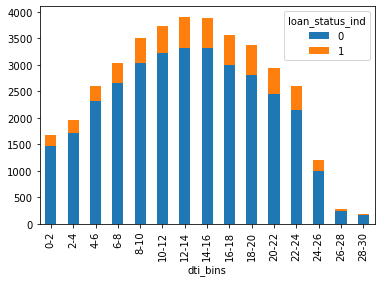

In [114]:
# Checking default rate across the dti ratios
loan_data.groupby('dti_bins').loan_status_ind.value_counts().unstack().plot(kind='bar',stacked=True)

In [115]:
# Let's see in percentage
loan_data.groupby('dti_bins').loan_status_ind.value_counts(normalize=True)

dti_bins  loan_status_ind
0-2       0                  0.879857
          1                  0.120143
2-4       0                  0.871677
          1                  0.128323
4-6       0                  0.886582
          1                  0.113418
6-8       0                  0.874422
          1                  0.125578
8-10      0                  0.864324
          1                  0.135676
10-12     0                  0.864966
          1                  0.135034
12-14     0                  0.848656
          1                  0.151344
14-16     0                  0.853206
          1                  0.146794
16-18     0                  0.840169
          1                  0.159831
18-20     0                  0.834323
          1                  0.165677
20-22     0                  0.830722
          1                  0.169278
22-24     0                  0.828252
          1                  0.171748
24-26     0                  0.829593
          1             

<AxesSubplot:xlabel='dti_bins'>

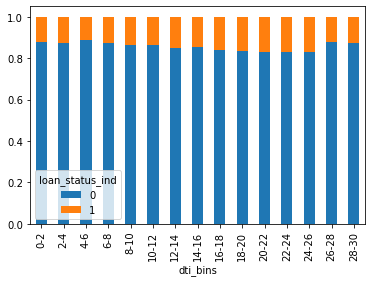

In [116]:
# Let's plot it
loan_data.groupby('dti_bins').loan_status_ind.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

- From the two plots, we can see the default rate increases as the dti increases.
- The last two bins not following the pattern since we don't have enough data in it.

    **Recommondation: Higher the dti, Higher the risk of defaulting. So better to go with lower dti.**

**28. annual_inc - The self-reported annual income provided by the borrower during registration.**

In [117]:
# Let's see the distribution
loan_data.annual_inc.value_counts()

60000.0     1466
50000.0     1029
40000.0      855
45000.0      811
30000.0      808
            ... 
80569.0        1
82116.0        1
242400.0       1
133300.0       1
27376.0        1
Name: annual_inc, Length: 5215, dtype: int64

In [118]:
loan_data.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

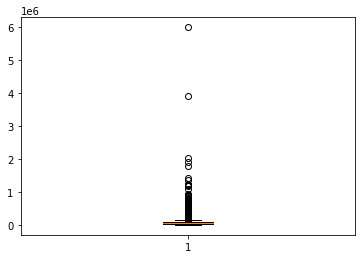

In [119]:
# Let's try boxplot to see the distribution of data
plt.boxplot(loan_data.annual_inc)
plt.show()

In [120]:
loan_data.annual_inc.quantile(0.95)

140004.0

With the help of describe and boxplot we can see that there are some outliers on the `upper side` with very side range. So `dropping the outliers - above 95th percentile`. 

In [121]:
# Dropping datas of annual_inc above 95th percentile
loan_data = loan_data[loan_data.annual_inc <= loan_data.annual_inc.quantile(0.95)]

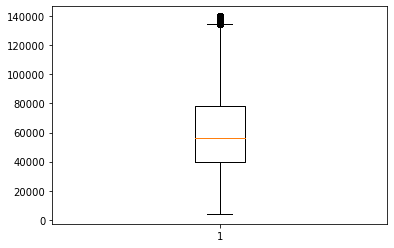

In [122]:
# Let's try boxplot one more time
plt.boxplot(loan_data.annual_inc)
plt.show()

Now, we can see the clear picture of box plot. So let's start binning the data.

In [123]:
# Binning the values by 10,000 intervals
loan_data['annual_inc_bins'] = pd.cut(loan_data['annual_inc'],bins=[0,20000,30000,40000,50000,60000,70000,80000,90000,100000,150000],labels=['0-20000','20000-30000','30000-40000','40000-50000','50000-60000','60000-70000','70000-80000','80000-90000','90000-100000','100000<'])

In [124]:
loan_data['annual_inc_bins'].value_counts()

40000-50000     5691
50000-60000     5572
30000-40000     5147
60000-70000     4096
100000<         3558
70000-80000     3525
20000-30000     3371
80000-90000     2510
90000-100000    2004
0-20000         1180
Name: annual_inc_bins, dtype: int64

<AxesSubplot:xlabel='annual_inc_bins'>

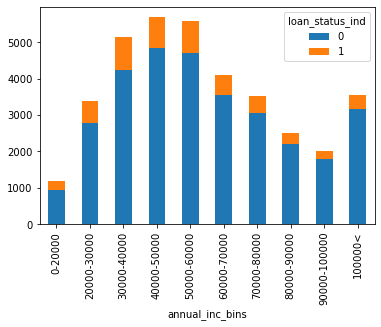

In [125]:
# Checking default rate across the annual_inc
loan_data.groupby('annual_inc_bins').loan_status_ind.value_counts().unstack().plot(kind='bar',stacked=True)

In [126]:
# Let's see in percentage
loan_data.groupby('annual_inc_bins').loan_status_ind.value_counts(normalize=True)

annual_inc_bins  loan_status_ind
0-20000          0                  0.799153
                 1                  0.200847
20000-30000      0                  0.821418
                 1                  0.178582
30000-40000      0                  0.822809
                 1                  0.177191
40000-50000      0                  0.848533
                 1                  0.151467
50000-60000      0                  0.844401
                 1                  0.155599
60000-70000      0                  0.863525
                 1                  0.136475
70000-80000      0                  0.868085
                 1                  0.131915
80000-90000      0                  0.878486
                 1                  0.121514
90000-100000     0                  0.887226
                 1                  0.112774
100000<          0                  0.892355
                 1                  0.107645
Name: loan_status_ind, dtype: float64

<AxesSubplot:xlabel='annual_inc_bins'>

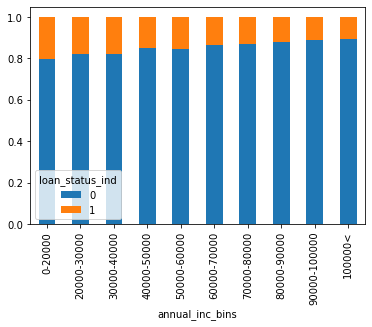

In [127]:
# Let's plot it
loan_data.groupby('annual_inc_bins').loan_status_ind.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

We can clearly see the pattern here, 
- As the income increases, the default rate decreases.

    **Recommendation: Higher the annual income, lower the risk of defaulting.**

**29. installment - The monthly payment owed by the borrower if the loan originates.**

In [128]:
# Let's see the distribution
loan_data.installment.value_counts()

311.11    65
180.96    56
311.02    52
150.80    46
372.12    44
          ..
464.53     1
274.21     1
215.74     1
45.78      1
255.43     1
Name: installment, Length: 14581, dtype: int64

In [129]:
loan_data.installment.describe()

count    36654.000000
mean       311.888682
std        199.230096
min         15.690000
25%        163.080000
50%        270.420000
75%        408.480000
max       1305.190000
Name: installment, dtype: float64

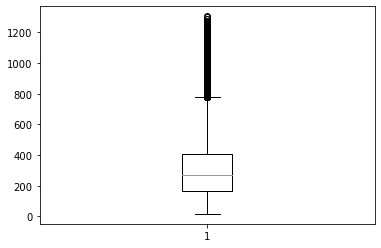

In [130]:
# Let's try boxplot to see the distribution of data
plt.boxplot(loan_data.installment)
plt.show()

In [131]:
loan_data.installment.quantile(0.95)

706.5574999999999

In [132]:
# Dropping datas of installment above 95th percentile
loan_data = loan_data[loan_data.installment <= loan_data.installment.quantile(0.95)]

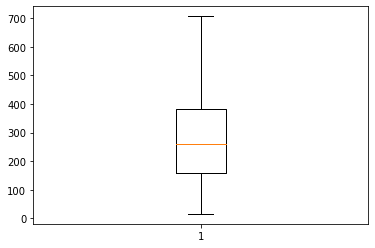

In [133]:
# Let's try boxplot one more time
plt.boxplot(loan_data.installment)
plt.show()

Now, we can see the clear picture of box plot. So let's start binning the data.

In [134]:
# Binning the values by 100 intervals mostly
loan_data['installment_bins'] = pd.cut(loan_data['installment'],bins=[0,100,150,200,250,300,350,450,550,800],labels=['0-100','100-150','150-200','200-250','250-300','300-350','350-450','450-550','550<'])

In [135]:
loan_data['installment_bins'].value_counts()

150-200    5217
350-450    4620
300-350    4000
200-250    3989
0-100      3924
100-150    3694
250-300    3413
450-550    3407
550<       2557
Name: installment_bins, dtype: int64

<AxesSubplot:xlabel='installment_bins'>

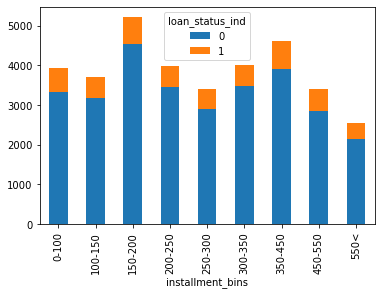

In [136]:
# Checking default rate across the installments
loan_data.groupby('installment_bins').loan_status_ind.value_counts().unstack().plot(kind='bar',stacked=True)

In [137]:
# Let's see in percentage
loan_data.groupby('installment_bins').loan_status_ind.value_counts(normalize=True)

installment_bins  loan_status_ind
0-100             0                  0.848369
                  1                  0.151631
100-150           0                  0.861126
                  1                  0.138874
150-200           0                  0.869082
                  1                  0.130918
200-250           0                  0.866884
                  1                  0.133116
250-300           0                  0.848227
                  1                  0.151773
300-350           0                  0.867750
                  1                  0.132250
350-450           0                  0.842641
                  1                  0.157359
450-550           0                  0.836220
                  1                  0.163780
550<              0                  0.833790
                  1                  0.166210
Name: loan_status_ind, dtype: float64

<AxesSubplot:xlabel='installment_bins'>

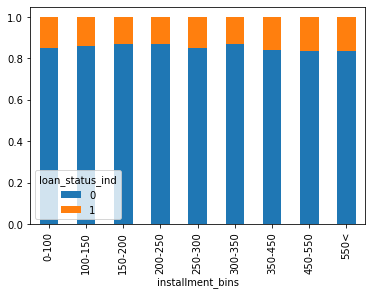

In [138]:
# Let's plot it
loan_data.groupby('installment_bins').loan_status_ind.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

- The graph is kind of going up and down.
- The default rate is keep on increasing after the installment is above 350
- On the other hand, it is kind of same for installments 100 to 350

**We are unable to get a prediction, since it is not following a clean pattern**

**30. loan_amnt - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.**

In [139]:
# Let's see the distribution
loan_data.loan_amnt.value_counts()

10000    2688
12000    2148
5000     1979
6000     1836
15000    1713
         ... 
34475       1
34800       1
17300       1
29500       1
13625       1
Name: loan_amnt, Length: 803, dtype: int64

In [140]:
loan_data.loan_amnt.describe()

count    34821.000000
mean      9802.171104
std       5970.401421
min        500.000000
25%       5000.000000
50%       8600.000000
75%      13500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

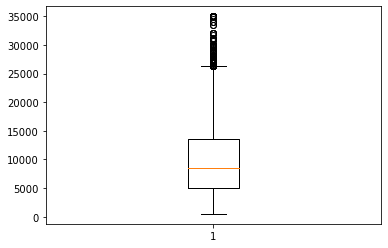

In [141]:
# Let's try boxplot to see the distribution of data
plt.boxplot(loan_data.loan_amnt)
plt.show()

In [142]:
loan_data.loan_amnt.quantile(0.98)

25000.0

In [143]:
# Dropping datas of loan_amnt above 98th percentile
loan_data = loan_data[loan_data.loan_amnt <= loan_data.loan_amnt.quantile(0.98)]

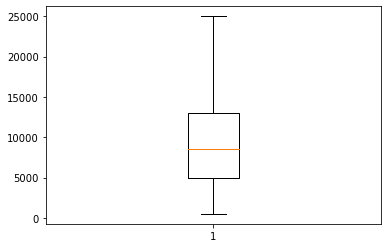

In [144]:
# Let's try boxplot one more time
plt.boxplot(loan_data.loan_amnt)
plt.show()

Now, we can see the clear picture of box plot. So let's start binning the data.

In [145]:
loan_data.loan_amnt.describe()

count    34486.000000
mean      9609.055124
std       5658.349023
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      25000.000000
Name: loan_amnt, dtype: float64

In [146]:
# Binning the values by 1500 intervals mostly
loan_data['loan_amnt_bins'] = pd.cut(loan_data['loan_amnt'],bins=[400,3000,4500,6000,7500,9000,10500,12000,15000,19000,26000],labels=['0-3000','3000-4500','4500-6000','6000-7500','7500-9000','9000-10500','10500-12000','12000-15000','15000-19000','19000<'])

In [147]:
loan_data['loan_amnt_bins'].value_counts()

4500-6000      5391
12000-15000    3974
0-3000         3784
9000-10500     3780
7500-9000      3185
10500-12000    3093
6000-7500      2954
19000<         2918
3000-4500      2910
15000-19000    2497
Name: loan_amnt_bins, dtype: int64

<AxesSubplot:xlabel='loan_amnt_bins'>

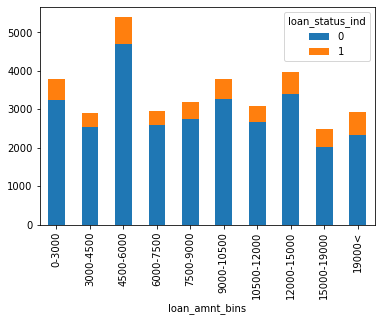

In [148]:
# Checking default rate across the loan_amnts
loan_data.groupby('loan_amnt_bins').loan_status_ind.value_counts().unstack().plot(kind='bar',stacked=True)

In [149]:
# Let's see in percentage
loan_data.groupby('loan_amnt_bins').loan_status_ind.value_counts(normalize=True)

loan_amnt_bins  loan_status_ind
0-3000          0                  0.856765
                1                  0.143235
3000-4500       0                  0.868041
                1                  0.131959
4500-6000       0                  0.870154
                1                  0.129846
6000-7500       0                  0.878131
                1                  0.121869
7500-9000       0                  0.858399
                1                  0.141601
9000-10500      0                  0.866667
                1                  0.133333
10500-12000     0                  0.866473
                1                  0.133527
12000-15000     0                  0.854303
                1                  0.145697
15000-19000     0                  0.810973
                1                  0.189027
19000<          0                  0.801234
                1                  0.198766
Name: loan_status_ind, dtype: float64

<AxesSubplot:xlabel='loan_amnt_bins'>

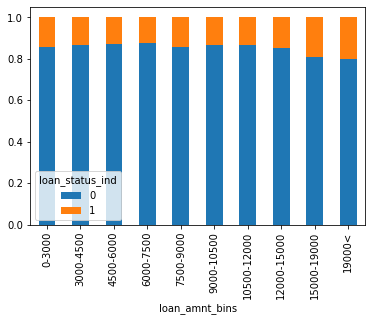

In [150]:
# Let's plot it
loan_data.groupby('loan_amnt_bins').loan_status_ind.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

**31. funded_amnt - The total amount committed to that loan at that point in time.**

In [151]:
# Let's see the distribution
loan_data.funded_amnt.value_counts()

10000    2603
12000    2062
5000     1967
6000     1826
15000    1613
         ... 
22325       1
3925        1
21025       1
19050       1
13875       1
Name: funded_amnt, Length: 835, dtype: int64

In [152]:
loan_data.funded_amnt.describe()

count    34486.000000
mean      9394.020762
std       5425.850674
min        500.000000
25%       5000.000000
50%       8400.000000
75%      12750.000000
max      25000.000000
Name: funded_amnt, dtype: float64

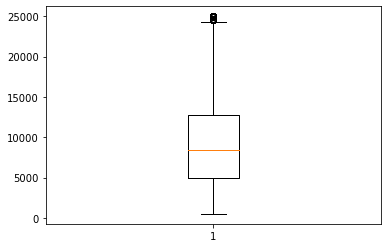

In [153]:
# Let's try boxplot to see the distribution of data
plt.boxplot(loan_data.funded_amnt)
plt.show()

It's kind of okay, we don't have much outliers. So proceeding with it.

In [154]:
# Binning the values by 1500 intervals mostly
loan_data['funded_amnt_bins'] = pd.cut(loan_data['funded_amnt'],bins=[400,3000,4500,6000,7500,9000,10500,12000,15000,19000,26000],labels=['0-3000','3000-4500','4500-6000','6000-7500','7500-9000','9000-10500','10500-12000','12000-15000','15000-19000','19000<'])

In [155]:
loan_data['funded_amnt_bins'].value_counts()

4500-6000      5453
12000-15000    4057
9000-10500     3837
0-3000         3809
7500-9000      3265
10500-12000    3126
6000-7500      3008
3000-4500      2955
15000-19000    2565
19000<         2411
Name: funded_amnt_bins, dtype: int64

<AxesSubplot:xlabel='funded_amnt_bins'>

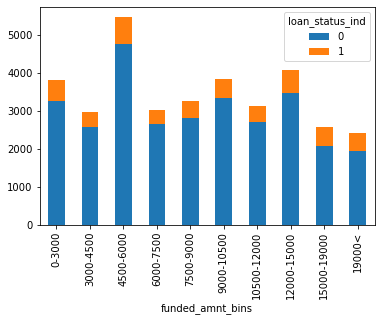

In [156]:
# Checking default rate across the funded_amnts
loan_data.groupby('funded_amnt_bins').loan_status_ind.value_counts().unstack().plot(kind='bar',stacked=True)

In [157]:
# Let's see in percentage
loan_data.groupby('funded_amnt_bins').loan_status_ind.value_counts(normalize=True)

funded_amnt_bins  loan_status_ind
0-3000            0                  0.856655
                  1                  0.143345
3000-4500         0                  0.867343
                  1                  0.132657
4500-6000         0                  0.869430
                  1                  0.130570
6000-7500         0                  0.879987
                  1                  0.120013
7500-9000         0                  0.858499
                  1                  0.141501
9000-10500        0                  0.865520
                  1                  0.134480
10500-12000       0                  0.863084
                  1                  0.136916
12000-15000       0                  0.855065
                  1                  0.144935
15000-19000       0                  0.807797
                  1                  0.192203
19000<            0                  0.798009
                  1                  0.201991
Name: loan_status_ind, dtype: float64

<AxesSubplot:xlabel='funded_amnt_bins'>

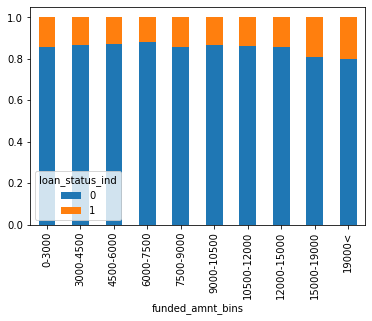

In [158]:
# Let's plot it
loan_data.groupby('funded_amnt_bins').loan_status_ind.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

**32. funded_amnt_inv - The total amount committed by investors for that loan at that point in time.**

In [159]:
# Let's see the distribution
loan_data.funded_amnt_inv.value_counts()

5000.00000     1264
10000.00000    1212
6000.00000     1154
12000.00000     972
8000.00000      862
               ... 
24905.49276       1
24205.49250       1
14905.78535       1
11995.73147       1
150.00000         1
Name: funded_amnt_inv, Length: 6689, dtype: int64

In [160]:
loan_data.funded_amnt_inv.describe()

count    34486.000000
mean      8918.486461
std       5414.401447
min          0.000000
25%       4807.905000
50%       8000.000000
75%      12000.000000
max      25000.000000
Name: funded_amnt_inv, dtype: float64

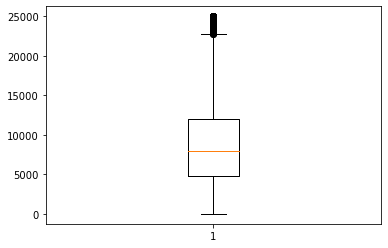

In [161]:
# Let's try boxplot to see the distribution of data
plt.boxplot(loan_data.funded_amnt_inv)
plt.show()

It's kind of okay, we don't have much outliers. So proceeding with it.

In [162]:
# Binning the values by 1500 intervals mostly
loan_data['funded_amnt_inv_bins'] = pd.cut(loan_data['funded_amnt_inv'],bins=[0,3000,4500,6000,7500,9000,10500,12000,15000,19000,26000],labels=['0-3000','3000-4500','4500-6000','6000-7500','7500-9000','9000-10500','10500-12000','12000-15000','15000-19000','19000<'])

In [163]:
loan_data['funded_amnt_inv_bins'].value_counts()

4500-6000      5376
0-3000         4587
12000-15000    3864
9000-10500     3605
7500-9000      3251
3000-4500      3185
6000-7500      2990
10500-12000    2980
15000-19000    2420
19000<         2103
Name: funded_amnt_inv_bins, dtype: int64

<AxesSubplot:xlabel='funded_amnt_inv_bins'>

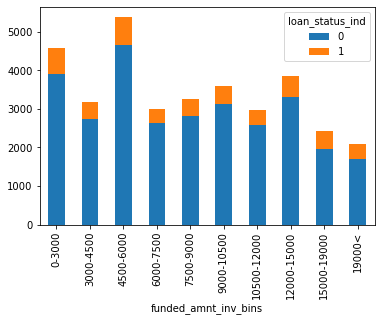

In [164]:
# Checking default rate across the funded_amnt_invs
loan_data.groupby('funded_amnt_inv_bins').loan_status_ind.value_counts().unstack().plot(kind='bar',stacked=True)

In [165]:
# Let's see in percentage
loan_data.groupby('funded_amnt_inv_bins').loan_status_ind.value_counts(normalize=True)

funded_amnt_inv_bins  loan_status_ind
0-3000                0                  0.849139
                      1                  0.150861
3000-4500             0                  0.858399
                      1                  0.141601
4500-6000             0                  0.868118
                      1                  0.131882
6000-7500             0                  0.877592
                      1                  0.122408
7500-9000             0                  0.863119
                      1                  0.136881
9000-10500            0                  0.871012
                      1                  0.128988
10500-12000           0                  0.865436
                      1                  0.134564
12000-15000           0                  0.856108
                      1                  0.143892
15000-19000           0                  0.810331
                      1                  0.189669
19000<                0                  0.803138
            

<AxesSubplot:xlabel='funded_amnt_inv_bins'>

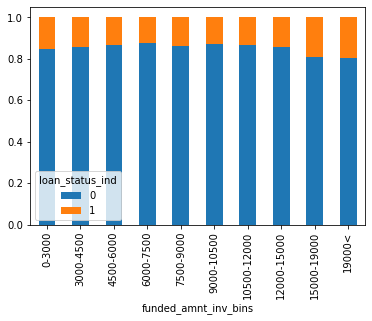

In [166]:
# Let's plot it
loan_data.groupby('funded_amnt_inv_bins').loan_status_ind.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

So, after seeing three columns(loan_amt,funded_amnt,funded_amnt_inv) graphs. We can give a combined observation since the three variables are highly correlated.
- When we see the final plot, we can see that either the lower range or the upper range are having higher default rate. The in-between values are having lower default rate.

**So, its better to ignore the two tails, like <4000 and >15000. As they have higher default rate.**

In [167]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34486 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             34486 non-null  int64   
 1   funded_amnt           34486 non-null  int64   
 2   funded_amnt_inv       34486 non-null  float64 
 3   term                  34486 non-null  object  
 4   int_rate              34486 non-null  float64 
 5   installment           34486 non-null  float64 
 6   grade                 34486 non-null  object  
 7   emp_length            33505 non-null  object  
 8   home_ownership        34486 non-null  object  
 9   annual_inc            34486 non-null  float64 
 10  verification_status   34486 non-null  object  
 11  issue_d               34486 non-null  object  
 12  loan_status           34486 non-null  object  
 13  purpose               34486 non-null  object  
 14  zip_code              34486 non-null  object  
 15  ad

Finally we have covered all the variables and got some observations.
- Out of 32 variables analysed, we got 16 variables which have some good observation or plots.(Excluding the derived metrics)

Now, let's see some correlation between all the continuous variables.

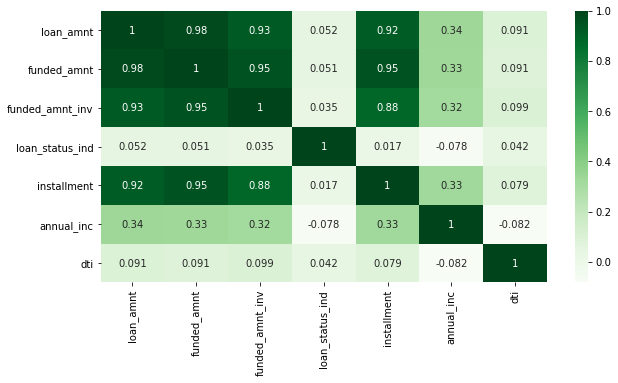

In [168]:
plt.figure(figsize=(10,5))
sns.heatmap(loan_data[["loan_amnt","funded_amnt", "funded_amnt_inv","loan_status_ind", "installment", "annual_inc", "dti"]] .corr(), annot=True, cmap='Greens')
plt.show()

We can see loan_amt, funded_amt, funded_amnt_inv and installment are highly correlated.

## <font color = 'dark blue'> Conclusion: </font>
In the given file, we had 111 columns. After completing data cleaning, we got 33 columns.
- Dropped rows which have loan status = Current
- Dropped columns which are 
    - redundant, 
    - having more null values,
    - customer behavior variables
    
After data analysis, out of 33 we got 11 columns have good patterns towards defaulting. In other words, the driving factors (or driver variables) behind loan default. Let's see one by one,

### 1. Term

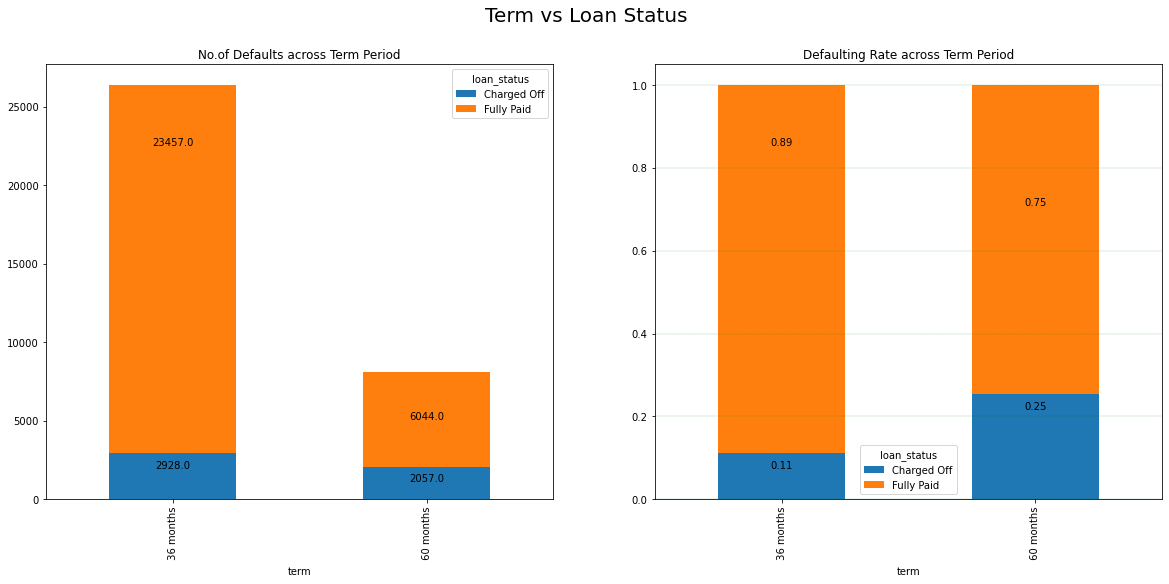

In [169]:
# Let's plot it
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Term vs Loan Status",fontsize=20)

fig1 = loan_data.groupby('term').loan_status.value_counts().unstack().plot(ax=axes[0],kind='bar',stacked=True)
axes[0].set_title("No.of Defaults across Term Period")

for p in fig1.patches:
    fig1.annotate(format(p.get_height().round(2)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, -12),
                   textcoords='offset points')

fig2 = loan_data.groupby('term').loan_status.value_counts(normalize=True).unstack().plot(ax=axes[1],kind='bar',stacked=True)
axes[1].set_title("Defaulting Rate across Term Period")

plt.grid(axis='y',color = 'green', linestyle = '--', linewidth = 0.2)
for p in fig2.patches:
    fig2.annotate(format(p.get_height().round(2)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, -12),
                   textcoords='offset points')

plt.show()

- We have good volume of data in both the terms.
- When comparing default rate across the terms, we can see more no.of loans are defaulted in 36 months term while comparing with 60 months term loans.
- But when seeing in percentage we can clearly see that, `25% of 60 months` term loans are defaulting. On the other hand, `11% of 36 months` term loans are defaulting.

**Recommendation:** So **36 months term** loans are preferrable.

### 2. Int Rate

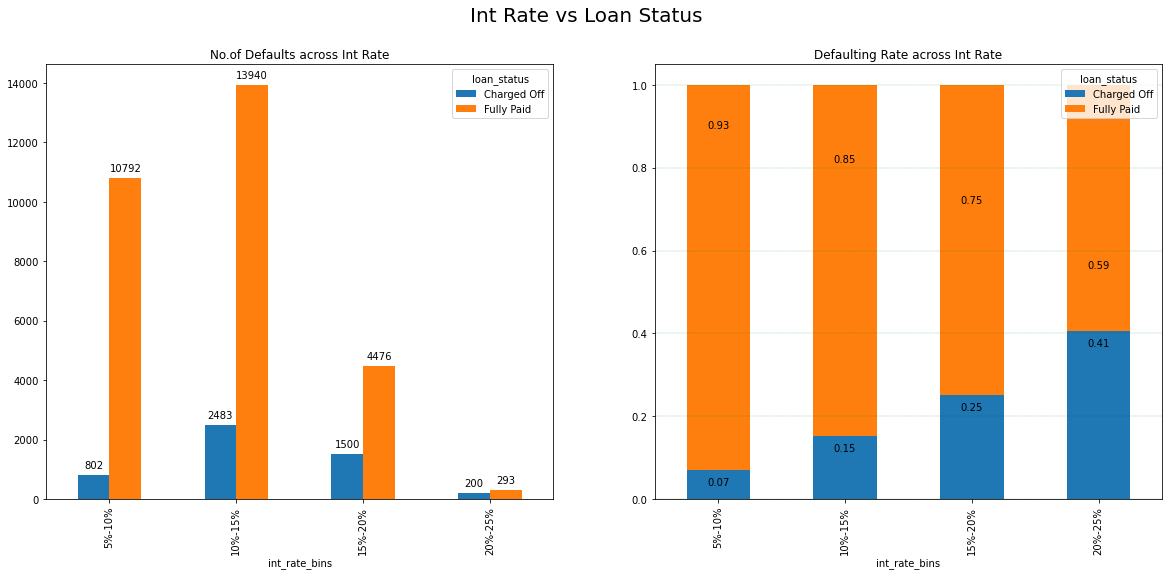

In [170]:
# Let's plot it
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Int Rate vs Loan Status",fontsize=20)

fig1 = loan_data.groupby('int_rate_bins').loan_status.value_counts().unstack().plot(ax=axes[0],kind='bar')
axes[0].set_title("No.of Defaults across Int Rate")

for p in fig1.patches:
    fig1.annotate(format(p.get_height().round(2)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

fig2 = loan_data.groupby('int_rate_bins').loan_status.value_counts(normalize=True).unstack().plot(ax=axes[1],kind='bar',stacked=True)
axes[1].set_title("Defaulting Rate across Int Rate")

plt.grid(axis='y',color = 'green', linestyle = '--', linewidth = 0.2)
for p in fig2.patches:
    fig2.annotate(format(p.get_height().round(2)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, -12),
                   textcoords='offset points')

plt.show()

- The amount of data is decreasing as the int rate percentage increases. And even though the data is `smaller` in higher percentages, the defaulting rate is `higher`.
- So we can clearly say that, `Higher the int_rate, Higher the risk of defaulting`.

**Recommendation:** **Lower the int rate, Lower the risk of defaulting**. 5 to 10% int rate is preferrable.

### 3. Grade

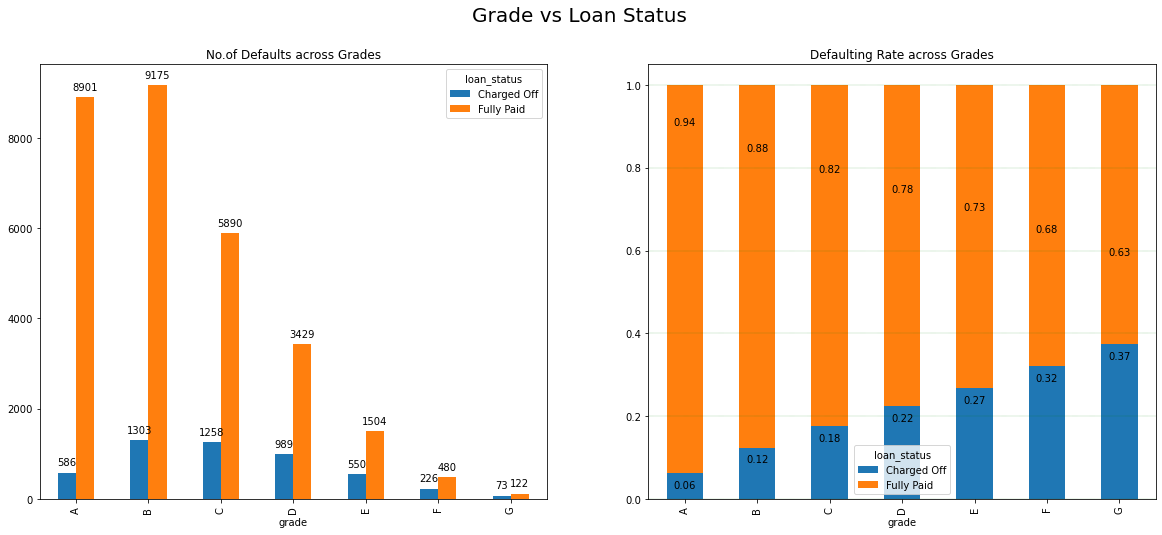

In [171]:
# Let's plot it
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Grade vs Loan Status",fontsize=20)

fig1 = loan_data.groupby('grade').loan_status.value_counts().unstack().plot(ax=axes[0],kind='bar')
axes[0].set_title("No.of Defaults across Grades")

for p in fig1.patches:
    fig1.annotate(format(p.get_height().round(2)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

fig2 = loan_data.groupby('grade').loan_status.value_counts(normalize=True).unstack().plot(ax=axes[1],kind='bar',stacked=True)
axes[1].set_title("Defaulting Rate across Grades")

plt.grid(axis='y',color = 'green', linestyle = '--', linewidth = 0.2)
for p in fig2.patches:
    fig2.annotate(format(p.get_height().round(2)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, -12),
                   textcoords='offset points')

plt.show()

- The amount of data is decreasing as the grade increases alphabetically. And even though the data is `smaller` in higher alphabets, the defaulting rate is `higher`.
- So we can clearly say that, `Higher the grade, Higher the risk of defaulting`.

**Recommendation:** **Lower the grade, Lower the risk of defaulting**. Grade A is preferrable.<br>
We are not going to show subgrade as both of them are correlated and without more classifications grade is giving us the same results as subgrade. So ignored it.

### 4. Purpose

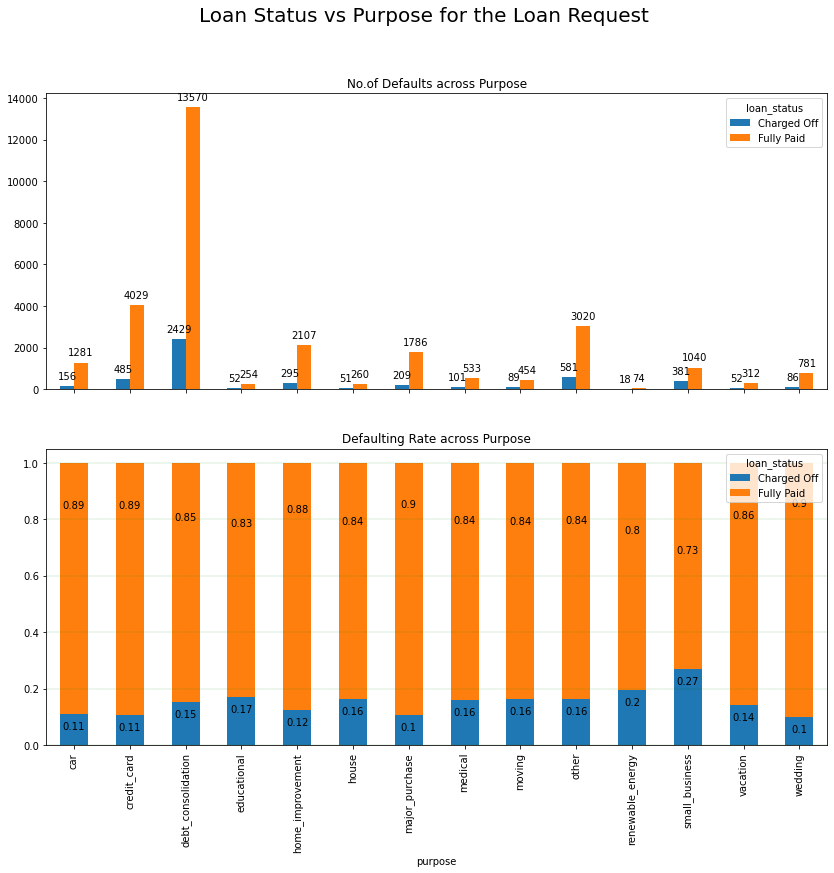

In [172]:
# Let's plot it
fig, axes = plt.subplots(2, 1, figsize=(14, 12),sharex=True)
fig.suptitle("Loan Status vs Purpose for the Loan Request",fontsize=20)

fig1 = loan_data.groupby('purpose').loan_status.value_counts().unstack().plot(ax=axes[0],kind='bar')
axes[0].set_title("No.of Defaults across Purpose")

for p in fig1.patches:
    fig1.annotate(format(p.get_height().round(2)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

fig2 = loan_data.groupby('purpose').loan_status.value_counts(normalize=True).unstack().plot(ax=axes[1],kind='bar',stacked=True)
axes[1].set_title("Defaulting Rate across Purpose")

plt.grid(axis='y',color = 'green', linestyle = '--', linewidth = 0.2)
for p in fig2.patches:
    fig2.annotate(format(p.get_height().round(2)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, -12),
                   textcoords='offset points')

plt.show()

- We have very large amount of data going into debt_consolidation.
- Small business have huge defaulting rate while comparing to others.
- Wedding, car, credit card & major purpose are seems to be safer when comparing to other purposes.

**Recommendation: It's better to ignore small business or double check in verifying.<br>
First level risk - small business<br>
second level risk - renewable_energy, other, educational, medical, moving<br>
Third level risk - debt_consolidation, vacation**

### 5. pub_rec_bankruptcies

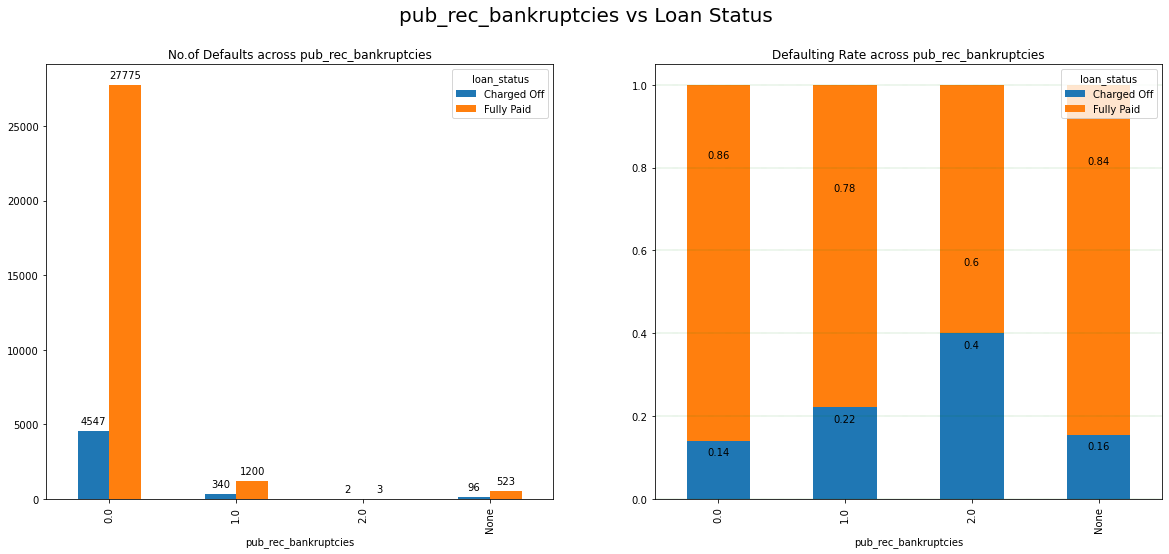

In [173]:
# Let's plot it
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("pub_rec_bankruptcies vs Loan Status",fontsize=20)

fig1 = loan_data.groupby('pub_rec_bankruptcies').loan_status.value_counts().unstack().plot(ax=axes[0],kind='bar')
axes[0].set_title("No.of Defaults across pub_rec_bankruptcies")

for p in fig1.patches:
    fig1.annotate(format(p.get_height().round(2)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

fig2 = loan_data.groupby('pub_rec_bankruptcies').loan_status.value_counts(normalize=True).unstack().plot(ax=axes[1],kind='bar',stacked=True)
axes[1].set_title("Defaulting Rate across pub_rec_bankruptcies")

plt.grid(axis='y',color = 'green', linestyle = '--', linewidth = 0.2)
for p in fig2.patches:
    fig2.annotate(format(p.get_height().round(2)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, -12),
                   textcoords='offset points')

plt.show()

- We don't have enough data in `2.0` category but even though, out of 5; 2 of them is defaulted.
- So we can clearly see when bankruptcies increases, default rate increases.
- It's better to get data in some way if it's unknown.

    **Recommendation: Higher the No.of bankruptcies, Higher the risk of defaulting**

### 6. dti

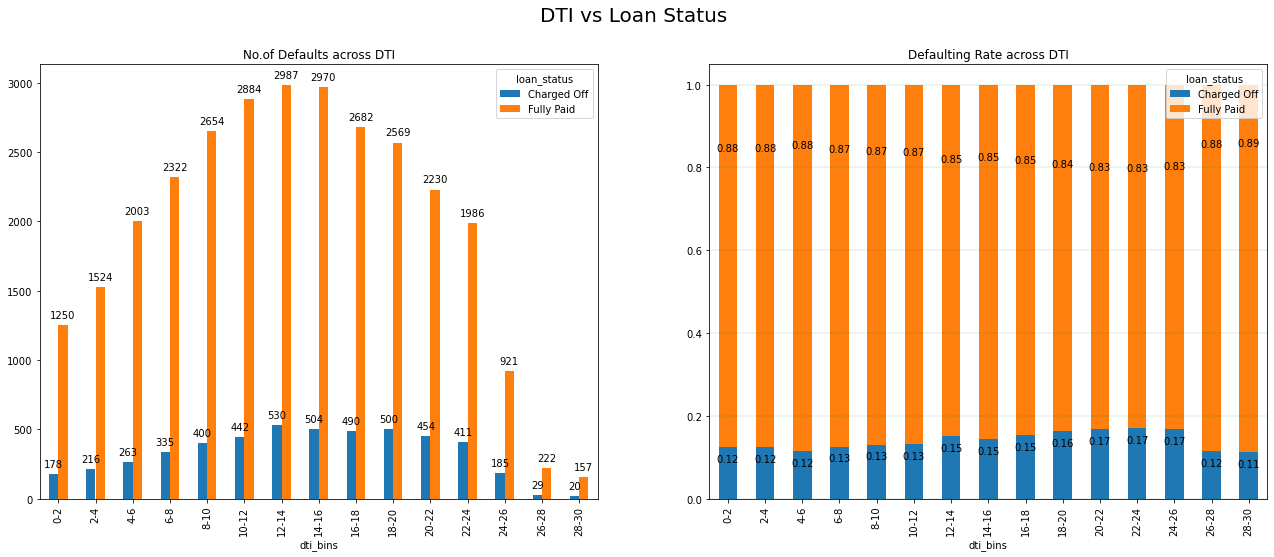

In [174]:
# Let's plot it
fig, axes = plt.subplots(1, 2, figsize=(22, 8))
fig.suptitle("DTI vs Loan Status",fontsize=20)

fig1 = loan_data.groupby('dti_bins').loan_status.value_counts().unstack().plot(ax=axes[0],kind='bar')
axes[0].set_title("No.of Defaults across DTI")

for p in fig1.patches:
    fig1.annotate(format(p.get_height().round(2)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

fig2 = loan_data.groupby('dti_bins').loan_status.value_counts(normalize=True).unstack().plot(ax=axes[1],kind='bar',stacked=True)
axes[1].set_title("Defaulting Rate across DTI")

plt.grid(axis='y',color = 'green', linestyle = '--', linewidth = 0.2)
for p in fig2.patches:
    fig2.annotate(format(p.get_height().round(2)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, -12),
                   textcoords='offset points')

plt.show()

- From the two plots, we can see the default rate increases as the dti increases.
- The last two bins not following the pattern since we don't have enough data in it.

    **Recommondation: Higher the dti, Higher the risk of defaulting. So better to go with lower dti.**

### 7. annual income


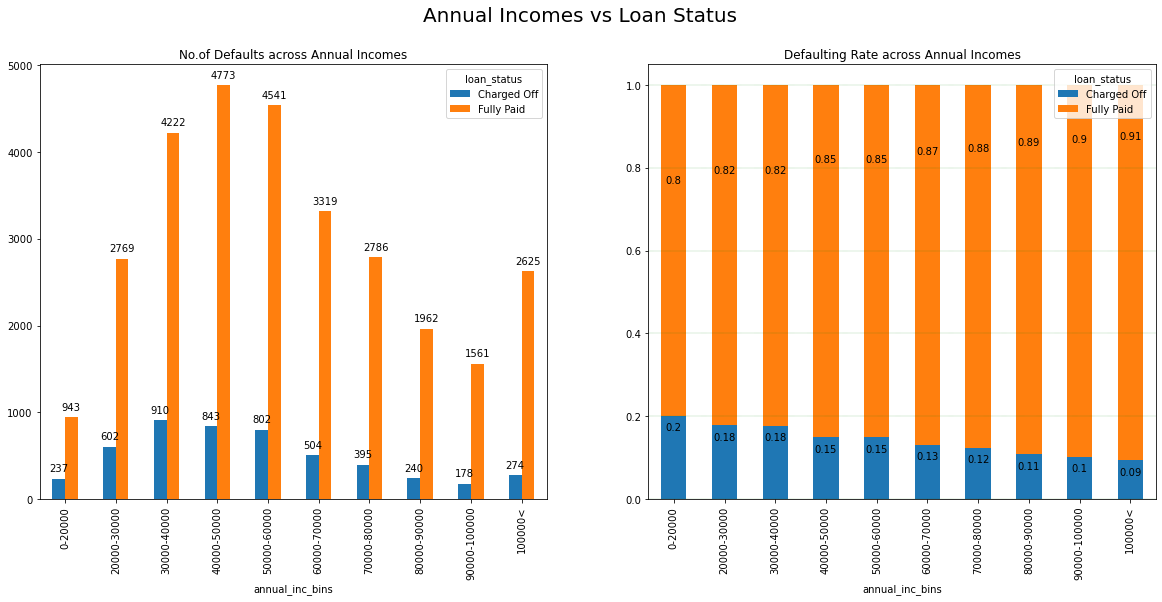

In [175]:
# Let's plot it
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Annual Incomes vs Loan Status",fontsize=20)

fig1 = loan_data.groupby('annual_inc_bins').loan_status.value_counts().unstack().plot(ax=axes[0],kind='bar')
axes[0].set_title("No.of Defaults across Annual Incomes")

for p in fig1.patches:
    fig1.annotate(format(p.get_height().round(2)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

fig2 = loan_data.groupby('annual_inc_bins').loan_status.value_counts(normalize=True).unstack().plot(ax=axes[1],kind='bar',stacked=True)
axes[1].set_title("Defaulting Rate across Annual Incomes")

plt.grid(axis='y',color = 'green', linestyle = '--', linewidth = 0.2)
for p in fig2.patches:
    fig2.annotate(format(p.get_height().round(2)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, -12),
                   textcoords='offset points')

plt.show()

We can clearly see the pattern here, 
- As the income increases, the default rate decreases.

    **Recommendation: Higher the annual income, lower the risk of defaulting.**

### 8-11. loan_amt, funded_amnt, funded_amnt_inv, installment

All the four columns are highly correlated. So considering the most correlated column i.e., `funded_amnt`

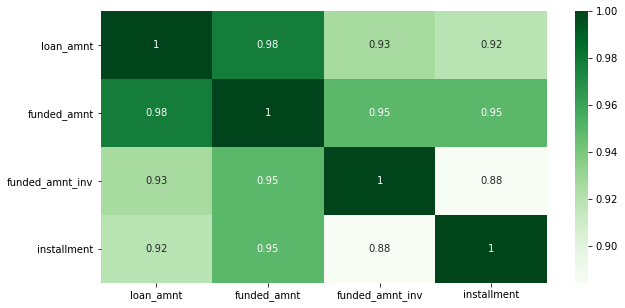

In [176]:
# Let's check the correlation
plt.figure(figsize=(10,5))
sns.heatmap(loan_data[["loan_amnt","funded_amnt", "funded_amnt_inv","installment"]] .corr(), annot=True, cmap='Greens')
plt.show()

So, Now let's see the distribution of funded_amnt

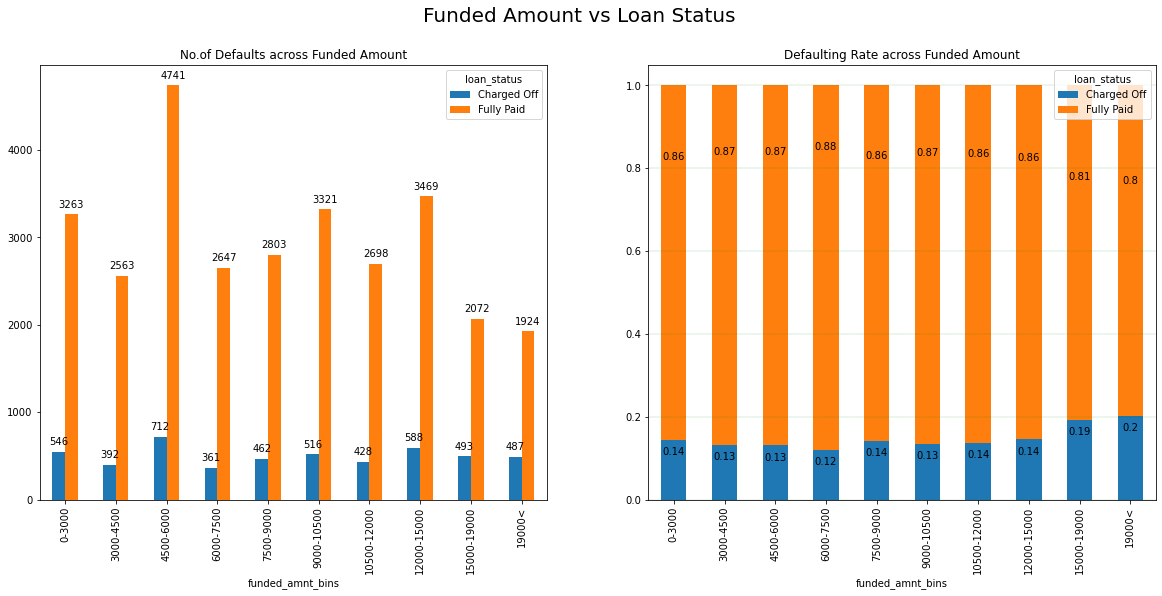

In [177]:
# Let's plot it
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Funded Amount vs Loan Status",fontsize=20)

fig1 = loan_data.groupby('funded_amnt_bins').loan_status.value_counts().unstack().plot(ax=axes[0],kind='bar')
axes[0].set_title("No.of Defaults across Funded Amount")

for p in fig1.patches:
    fig1.annotate(format(p.get_height().round(2)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

fig2 = loan_data.groupby('funded_amnt_bins').loan_status.value_counts(normalize=True).unstack().plot(ax=axes[1],kind='bar',stacked=True)
axes[1].set_title("Defaulting Rate across Funded Amount")

plt.grid(axis='y',color = 'green', linestyle = '--', linewidth = 0.2)
for p in fig2.patches:
    fig2.annotate(format(p.get_height().round(2)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, -12),
                   textcoords='offset points')

plt.show()

- When we see the final plots, we can see that either the lower range or the upper range are having higher default rate. The in-between values are having lower default rate.

**So, its better to ignore the two tails, like <4000 and >15000. As they have higher default rate.**

## <font color = 'dark blue'> Observations: </font>
- Other than the driver variables, We found some of the variables can be useful to find the defaulting if we choose some level of risk percentage.
- These variables can predict the default rate and help to ignore some of the loan requests.

1. zip code


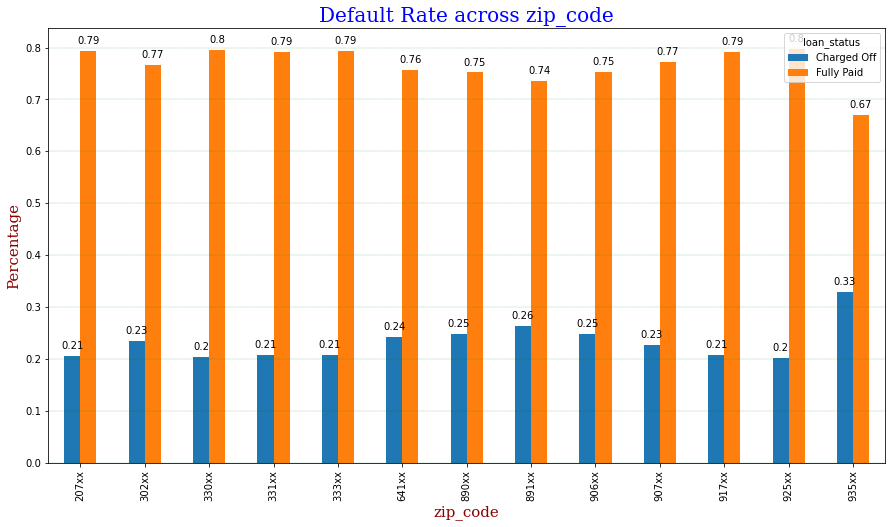

In [178]:
# Let's plot it
fig = loan_data_zip_wise.groupby('zip_code').loan_status.value_counts(normalize=True).unstack().plot(kind='bar')

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Default Rate across zip_code", fontdict = font1)
plt.xlabel("zip_code", fontdict = font2)
plt.ylabel("Percentage", fontdict = font2)
plt.grid(axis='y',color = 'green', linestyle = '--', linewidth = 0.2)

for p in fig.patches:
    fig.annotate(format(p.get_height().round(2)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

plt.gcf().set_size_inches(15, 8, forward=True)
plt.show()

- Filtered the zip codes with default rate > 20 percent and frequency > 100 then ploted.

- These zip codes can be ignored while investing. Since they have more than 20% default rate.
 
**Recommendation: This variable can predict the default rate and help to ignore some of the zip codes.**

2. addr_state

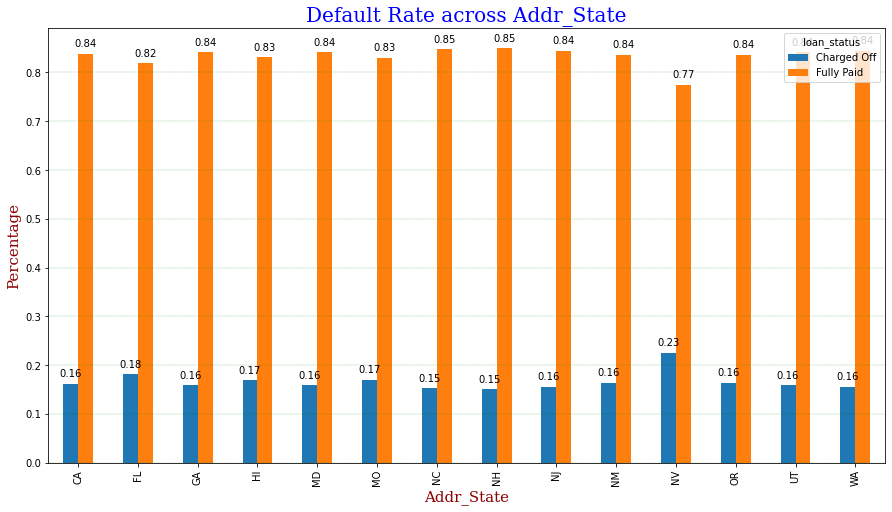

In [179]:
# Let's plot it
fig = loan_data_addr_state_wise.groupby('addr_state').loan_status.value_counts(normalize=True).unstack().plot(kind='bar')

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Default Rate across Addr_State", fontdict = font1)
plt.xlabel("Addr_State", fontdict = font2)
plt.ylabel("Percentage", fontdict = font2)
plt.grid(axis='y',color = 'green', linestyle = '--', linewidth = 0.2)

for p in fig.patches:
    fig.annotate(format(p.get_height().round(2)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

plt.gcf().set_size_inches(15, 8, forward=True)
plt.show()

- Filtered the addr_states with default rate > 15 percent and frequency > 100 then ploted.
 
**Recommendation: This variable can predict the default rate and help to ignore some of the addr_states.**

**A Small Note:** Cherdet is not giving us the right encoding, So proceeding without encoding as we got the data correctly anyway.

In [180]:
with open("loan.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(1000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


## Final Results

As a final results a quick wrap up, The driving variables behind loan default are<br>
#### First-level driving factors:
1. **Term** - 36 months term loans are preferrable than 60 months term loans.
2. **Grade** - Lower the grade, Lower the risk of defaulting. Grade A is preferrable.
3. **DTI** - Higher the dti, Higher the risk of defaulting. So better to go with lower dti.
4. **Annual Income** - Higher the annual income, lower the risk of defaulting.

#### Second-level driving factors:
5. **Int Rate** - Lower the int rate, Lower the risk of defaulting. 5 to 10% int rate is preferrable.
6. **pub_rec_bankruptcies** - Higher the No.of bankruptcies, Higher the risk of defaulting
7. **loan_amt, funded_amnt, funded_amnt_inv, installment** are highly correlated. As funded_amnt is mostly correlated with others, while considering funded_amnt and analyzing, 
- its better to ignore the two tails, like <4000 and >15000. As they have higher default rate.
8. **Purpose**: 
- First level risk - small business. 
- Second level risk - renewable_energy, other, educational, medical, moving. 
- Third level risk - debt_consolidation, vacation.

### With this we are completing our analysis. Hope from this, You would have found the right driving variables behind loan default. Thank You :)